In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, ifft,fftshift
import control
import sympy as sp

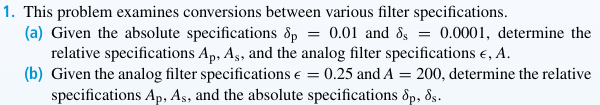

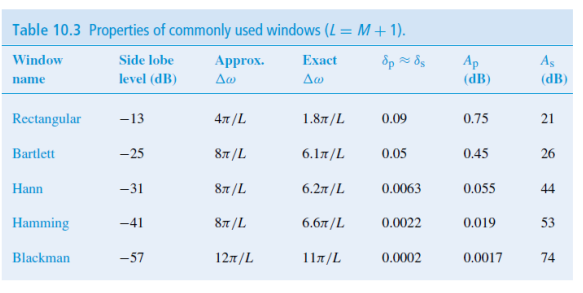

# a)

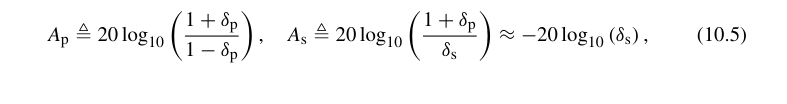

In [38]:
dp=0.01
ds=0.0001
Ap=20*np.log10((1+dp)/(1-dp))
As=20*np.log10((1+dp)/(ds))
Ap,As,-20*np.log10(ds)


(0.17372358370185242, 80.08642747565284, 80.0)

D.v.s  
$$A_p = 0.17 dB$$  
$$A_s = 80.1 dB$$

In [34]:
np.sqrt(10**(0.1*Ap)-1)

0.20202020202020185

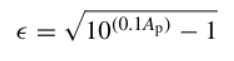

$$\epsilon =\sqrt{10^{0.1A_p}-1}=0.20$$

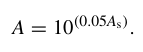

In [36]:
A=10**(0.05*As)
A

10099.99999999999

$$A=100100$$

# b)

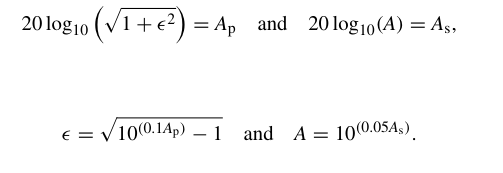

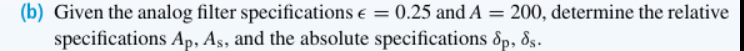

\begin{align*}
A=10^{0.05A_s}\\
log_{10}(A)=log_10(10^{0.05A_s})\\
log_{10}(A)=0.05A_s\\
A_s&=20log_{10}(A)\\
A_s&=20\cdot log{10}(200)
\end{align*}

In [4]:
20*np.log10(200)

46.020599913279625

$$A_s=46 dB$$

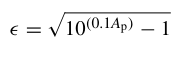

\begin{align*}
\epsilon &=\sqrt{10^{0.1A_p}-1}\\
10^{0.1A_p}-1&=\epsilon ^2\\
10^{0.1A_p}&=\epsilon ^2+1\\
10^{0.1A_p}&=\\
0.1A_p &=log_{10} (\epsilon ^2+1)\\
A_p &=10\cdot log_{10} (\epsilon ^2+1)\\
\end{align*}

In [5]:
eps=0.25
10*np.log10(0.25**2 +1)

0.2632893872234915

$$A_p=0.2633 dB$$

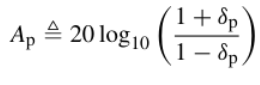

\begin{align*}
20log_{10}(\frac{1+\delta _p}{1-\delta _p})&=A_p\\
log_{10}(\frac{1+\delta _p}{1-\delta _p})&=1/20A_p\\
\frac{1+\delta _p}{1-\delta _p}&=10^{1/20A_p}\\
1+\delta _p&=10^{1/20A_p}(1-\delta _p)\\
1+\delta _p&=10^{1/20A_p}-\delta _p10^{1/20A_p}\\
1+\delta _p (1+10^{1/20A_p})&=10^{1/20A_p}\\
\delta _p (1+10^{1/20A_p})&=10^{1/20A_p}-1\\
\delta _p &=\frac{10^{1/20A_p}-1}{1+10^{1/20A_p}}\\
\end{align*}

In [7]:
Ap=10*np.log10(0.25**2 +1)
dp=(10**((1/20)*Ap)-1)/(1+10**((1/20)*Ap))
dp

0.015154995058715605

$$\delta _p =0.015$$

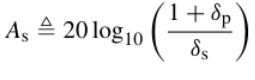

\begin{align*}
20log_{10}(\frac{1+\delta _p}{\delta _s})&=A_s\\
log_{10}(\frac{1+\delta _p}{\delta _s})&=1/20A_s\\
\frac{1+\delta _p}{\delta _s}&=10^{(1/20A_s)}\\
1+\delta _p&=10^{(1/20A_s)}\delta _s\\
10^{(1/20A_s)}\delta _s&=1+\delta _p\\
\delta _s&=\frac{1+\delta _p}{10^{(1/20A_s)}}\\
\end{align*}

In [10]:
dp=(10**((1/20)*Ap)-1)/(1+10**((1/20)*Ap))
As=20*np.log10(200)
ds=(1+dp)/(10**((1/20)*As))
ds

0.005075774975293577

$$\delta _s =0.005$$

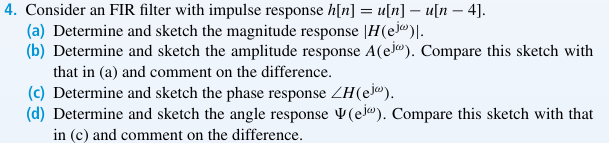

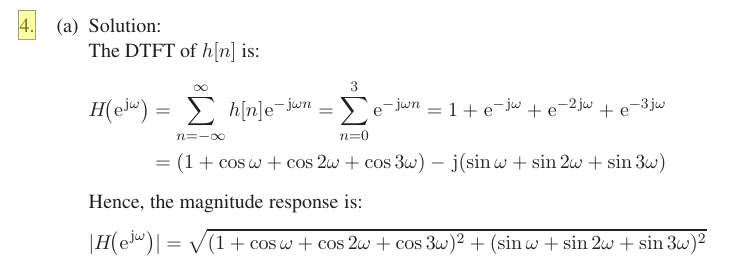

# a)

$$H(e^{jw})=\frac{1}{1-e^{-jw}}-\frac{e^{-4jw}}{1-e^{-jw}}=\frac{1-e^{-4jw}}{1-e^{-jw}}$$

$$|H(e^{jw})|=\frac{\sqrt{(1-\cos(4w))^2+(\sin(4w))^2}}{\sqrt{(1-\cos(w))^2+(\sin(w))^2}}$$

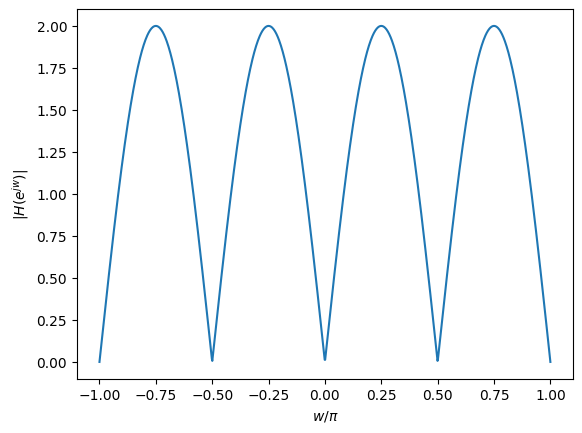

In [13]:
def H(omega):
    return (1-np.exp(-4j*omega))/(-np.exp(-1j*omega))
o=np.linspace(-np.pi,np.pi,1000)
plt.plot(o/np.pi,abs(H(o)))
plt.xlabel("$w/\pi$")
plt.ylabel("$|H(e^{jw})|$")
plt.show()


# b)

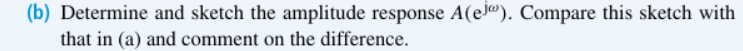

from   
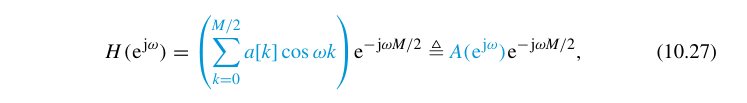

Where M=4, it can be seen that $H(e^{jw})=A(e^{jw})e^{-jwM/2}$  where  
  

  
$H(e^{jw})e^{jwM/2}=A(e^{jw})e^{-jwM/2}e^{jwM/2}=A(e^{jw})$  
  
$A(e^{jw})=H(e^{jw})e^{jwM/2}$

Text(0, 0.5, '$|H(e^{jw})|$ in red and $A(e^{jw})$ in blue')

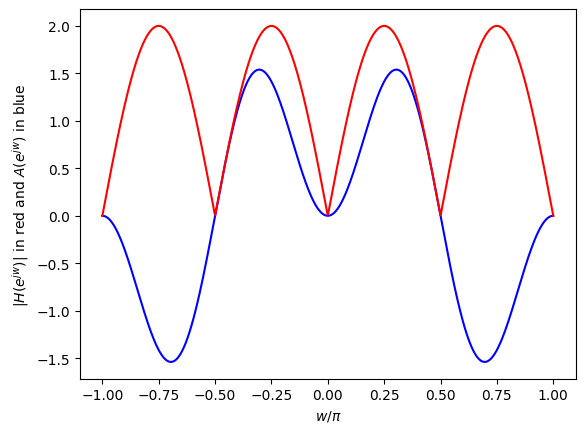

In [42]:
def A(omega):
    return H(omega)*np.exp(2j*omega)
plt.plot(o/np.pi,A(o),'b')
plt.plot(o/np.pi,abs(H(o)),'r')
plt.xlabel("$w/\pi$")
plt.ylabel("$|H(e^{jw})|$ in red and $A(e^{jw})$ in blue")


# c)

$$H(e^{jw})=\frac{1-e^{-4jw}}{1-e^{-jw}}$$

$$\angle H(e^{jw})=\tan ^-1(\frac{\frac{\sin(-4w)}{\sin(-w)}}{\frac{1-\cos(-4w)}{1-\cos(-w)}}) $$

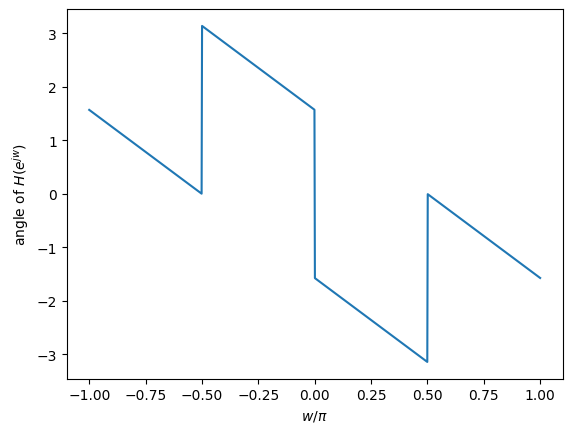

In [43]:
def H(omega):
    return (1-np.exp(-4j*omega))/(-np.exp(-1j*omega))
o=np.linspace(-np.pi,np.pi,1000)
plt.plot(o/np.pi,np.angle(H(o)))
plt.xlabel("$w/\pi$")
plt.ylabel("angle of $H(e^{jw})$")
plt.show()

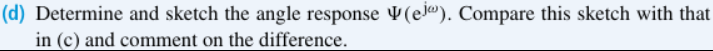

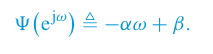

$$\alpha =M/2$$

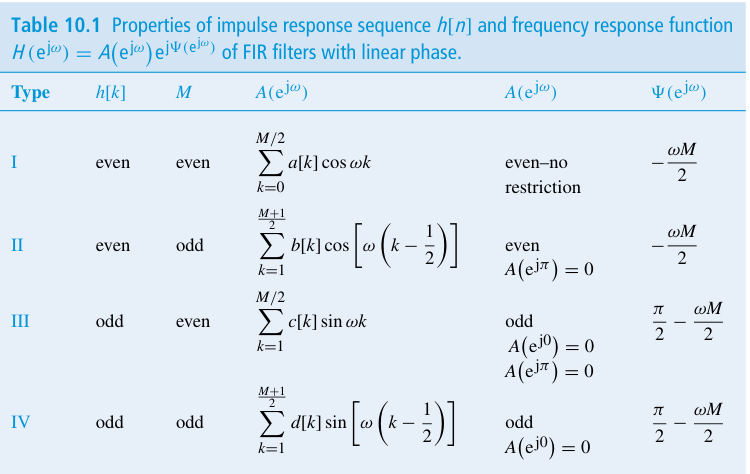

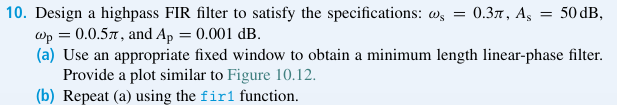

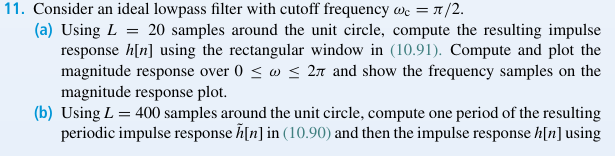
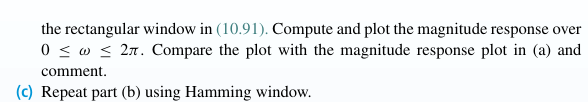

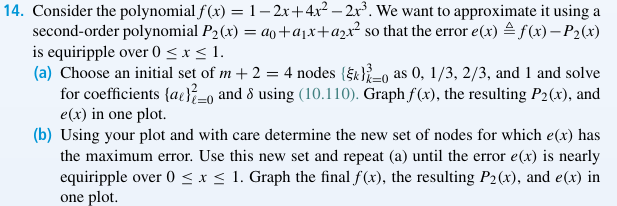

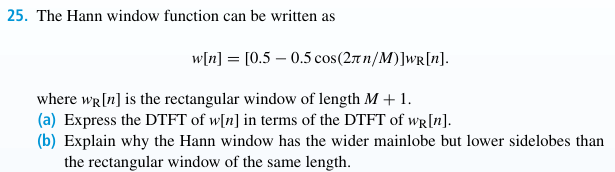

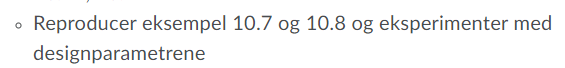